In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Create Scatter Plot:-

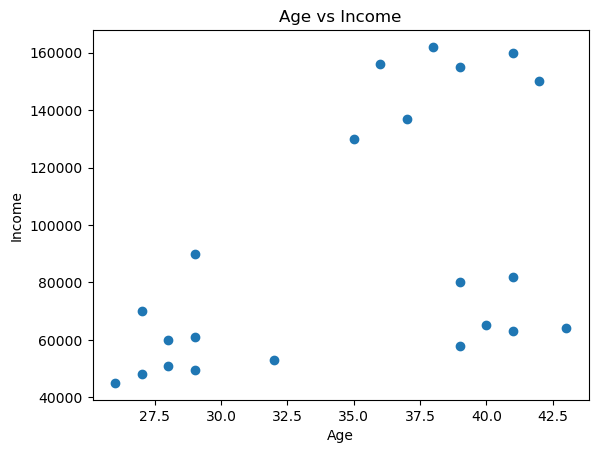

In [3]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

# Apply KMeans Clustering WithOut Scalling:-

In [4]:
from sklearn.cluster import KMeans

In [5]:
model = KMeans(n_clusters=3)

In [6]:
X = df.drop(["Name"],axis = 1)

In [7]:
X

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [8]:
model.fit(X)

KMeans(n_clusters=3)

In [9]:
y_pred = model.predict(X)
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
new_df = df.copy()

In [11]:
new_df["cluster"] = y_pred

In [12]:
new_df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


# find cluster centriod:-

In [13]:
cent = model.cluster_centers_
cent

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

# Draw Scatter Plot with centriod point:-

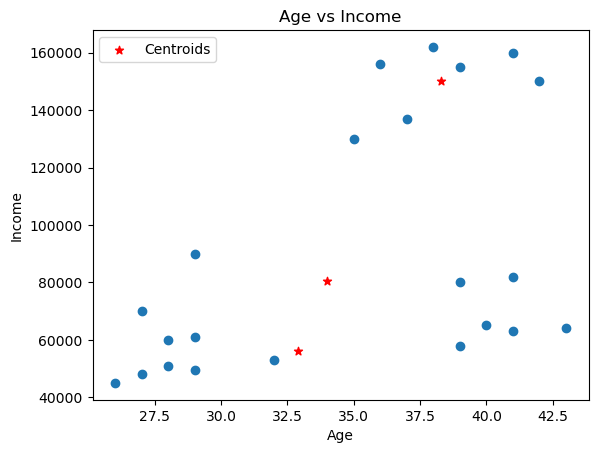

In [14]:
plt.scatter(df["Age"], df["Income($)"])
plt.scatter(cent[:, 0], cent[:, 1], color = "red", label = "Centroids",marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.legend()
plt.show()

# Group wise draw scatter plot:-

In [15]:
a = new_df[new_df["cluster"]==0]
b = new_df[new_df["cluster"]==1]
c = new_df[new_df["cluster"]==2]

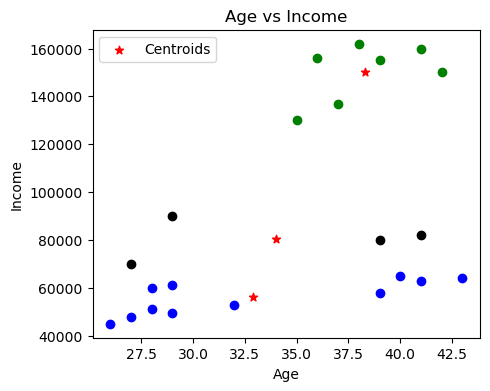

In [16]:
plt.figure(figsize=(5,4))
plt.scatter(a["Age"], a["Income($)"], color = "blue")
plt.scatter(b["Age"], b["Income($)"], color = "green")
plt.scatter(c["Age"], c["Income($)"], color = "black")
plt.scatter(cent[:, 0], cent[:, 1], color = "red", label = "Centroids", marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.legend()
plt.show()

# Apply KMeans Clustering With MinMaxScaler Scalling:-

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scale = MinMaxScaler()

In [19]:
scale.fit(df[["Income($)"]])
df["Income($)"] = scale.transform(df[["Income($)"]])

In [20]:
scale.fit(df[["Age"]])
df["Age"] = scale.transform(df[["Age"]])

In [21]:
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


# draw scatter plot:-

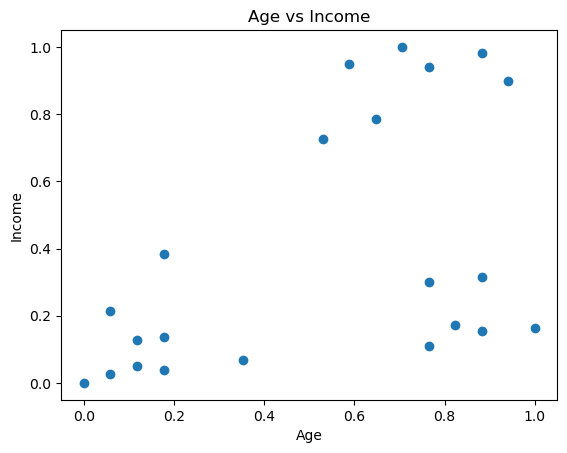

In [22]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

In [23]:
model2 = KMeans(n_clusters=3)

In [24]:
model2.fit(df[["Age", "Income($)"]])

KMeans(n_clusters=3)

In [25]:
y_pred2 = model2.predict(df[["Age", "Income($)"]])
y_pred2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
df["Clusters"] = y_pred2

In [27]:
df.head()

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


# find cluster centriod:-

In [28]:
cent_new = model2.cluster_centers_
cent_new

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

# Group wise draw scatter plot:-

In [29]:
p = df[df["Clusters"]==0]
q = df[df["Clusters"]==1]
r = df[df["Clusters"]==2]

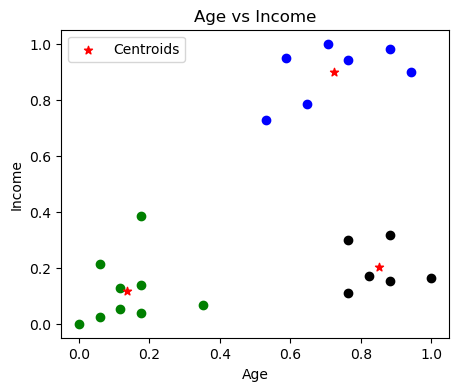

In [30]:
plt.figure(figsize=(5,4))
plt.scatter(p["Age"], p["Income($)"], color = "blue")
plt.scatter(q["Age"], q["Income($)"], color = "green")
plt.scatter(r["Age"], r["Income($)"], color = "black")
plt.scatter(cent_new[:, 0], cent_new[:, 1], color = "red", label = "Centroids", marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.legend()
plt.show()

# find Inertia:-

In [31]:
model.inertia_

1577046058.8831167

In [32]:
model2.inertia_

0.4750783498553096

In [33]:
inert = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    inert.append(km.inertia_)

In [34]:
inert

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.1327661931978319,
 0.10907864282306068,
 0.08026197041664467]

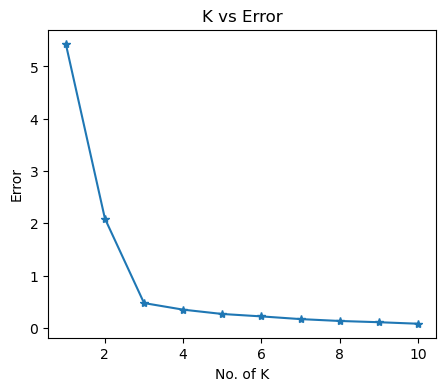

In [35]:
plt.figure(figsize=(5,4))
plt.xlabel("No. of K")
plt.ylabel("Error")
plt.title("K vs Error")
plt.plot(range(1,11), inert, marker = "*")
plt.show()